# <font color="red"> Regression - Rakam Tahminleme

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel("cars.xls")

# EDA - Exploratory Data Analysis

In [5]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [7]:
df.tail() # son beş satırı gösterir

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [8]:
df.info() #veri türlerini gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [9]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [10]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [11]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [12]:
df["Make"].nunique()

6

In [13]:
df["Make"].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [19]:
df["Make"].value_counts(normalize=True)*100

Chevrolet    39.800995
Pontiac      18.656716
SAAB         14.179104
Buick         9.950249
Cadillac      9.950249
Saturn        7.462687
Name: Make, dtype: float64

In [17]:
import seaborn as sns

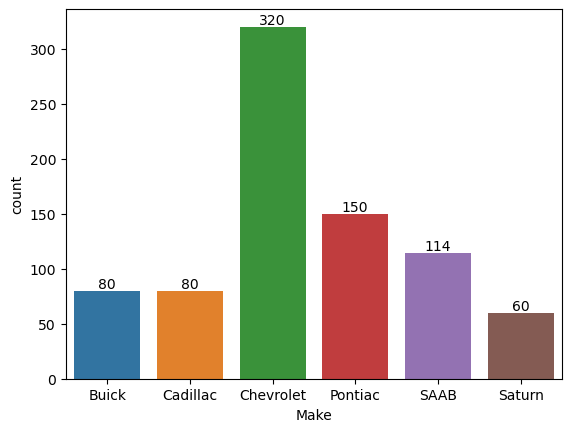

In [21]:
ax=sns.countplot(x=df["Make"]);
ax.bar_label(ax.containers[0]);

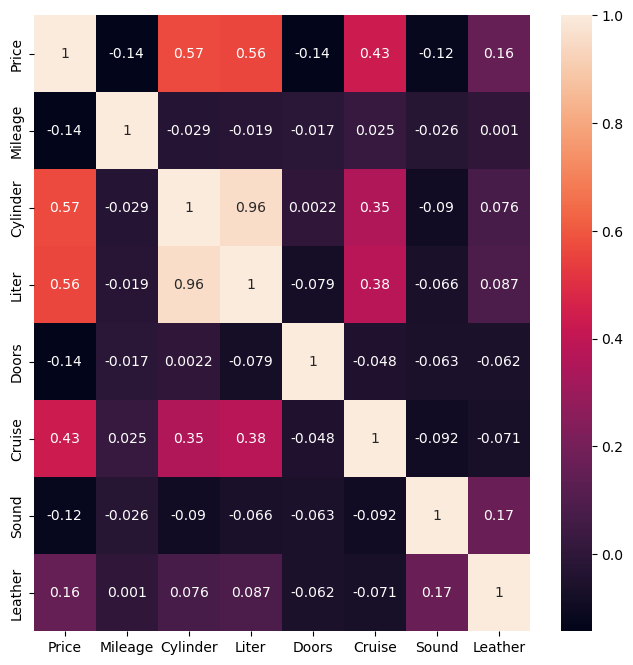

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [28]:
abs(df.corr()['Price'].sort_values(ascending=False))

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [29]:
df["Doors"].value_counts()

4    614
2    190
Name: Doors, dtype: int64

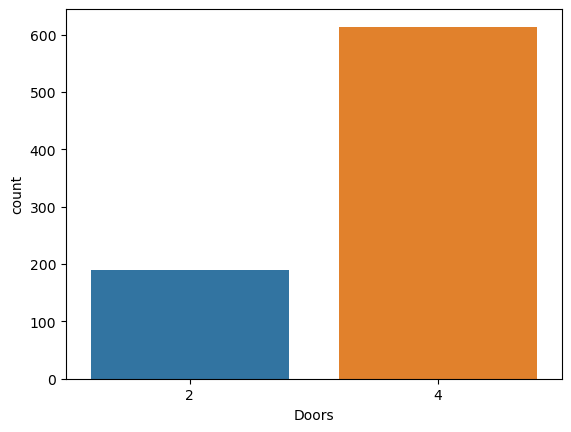

In [30]:
sns.countplot(x=df["Doors"]);

## Feature Engineering

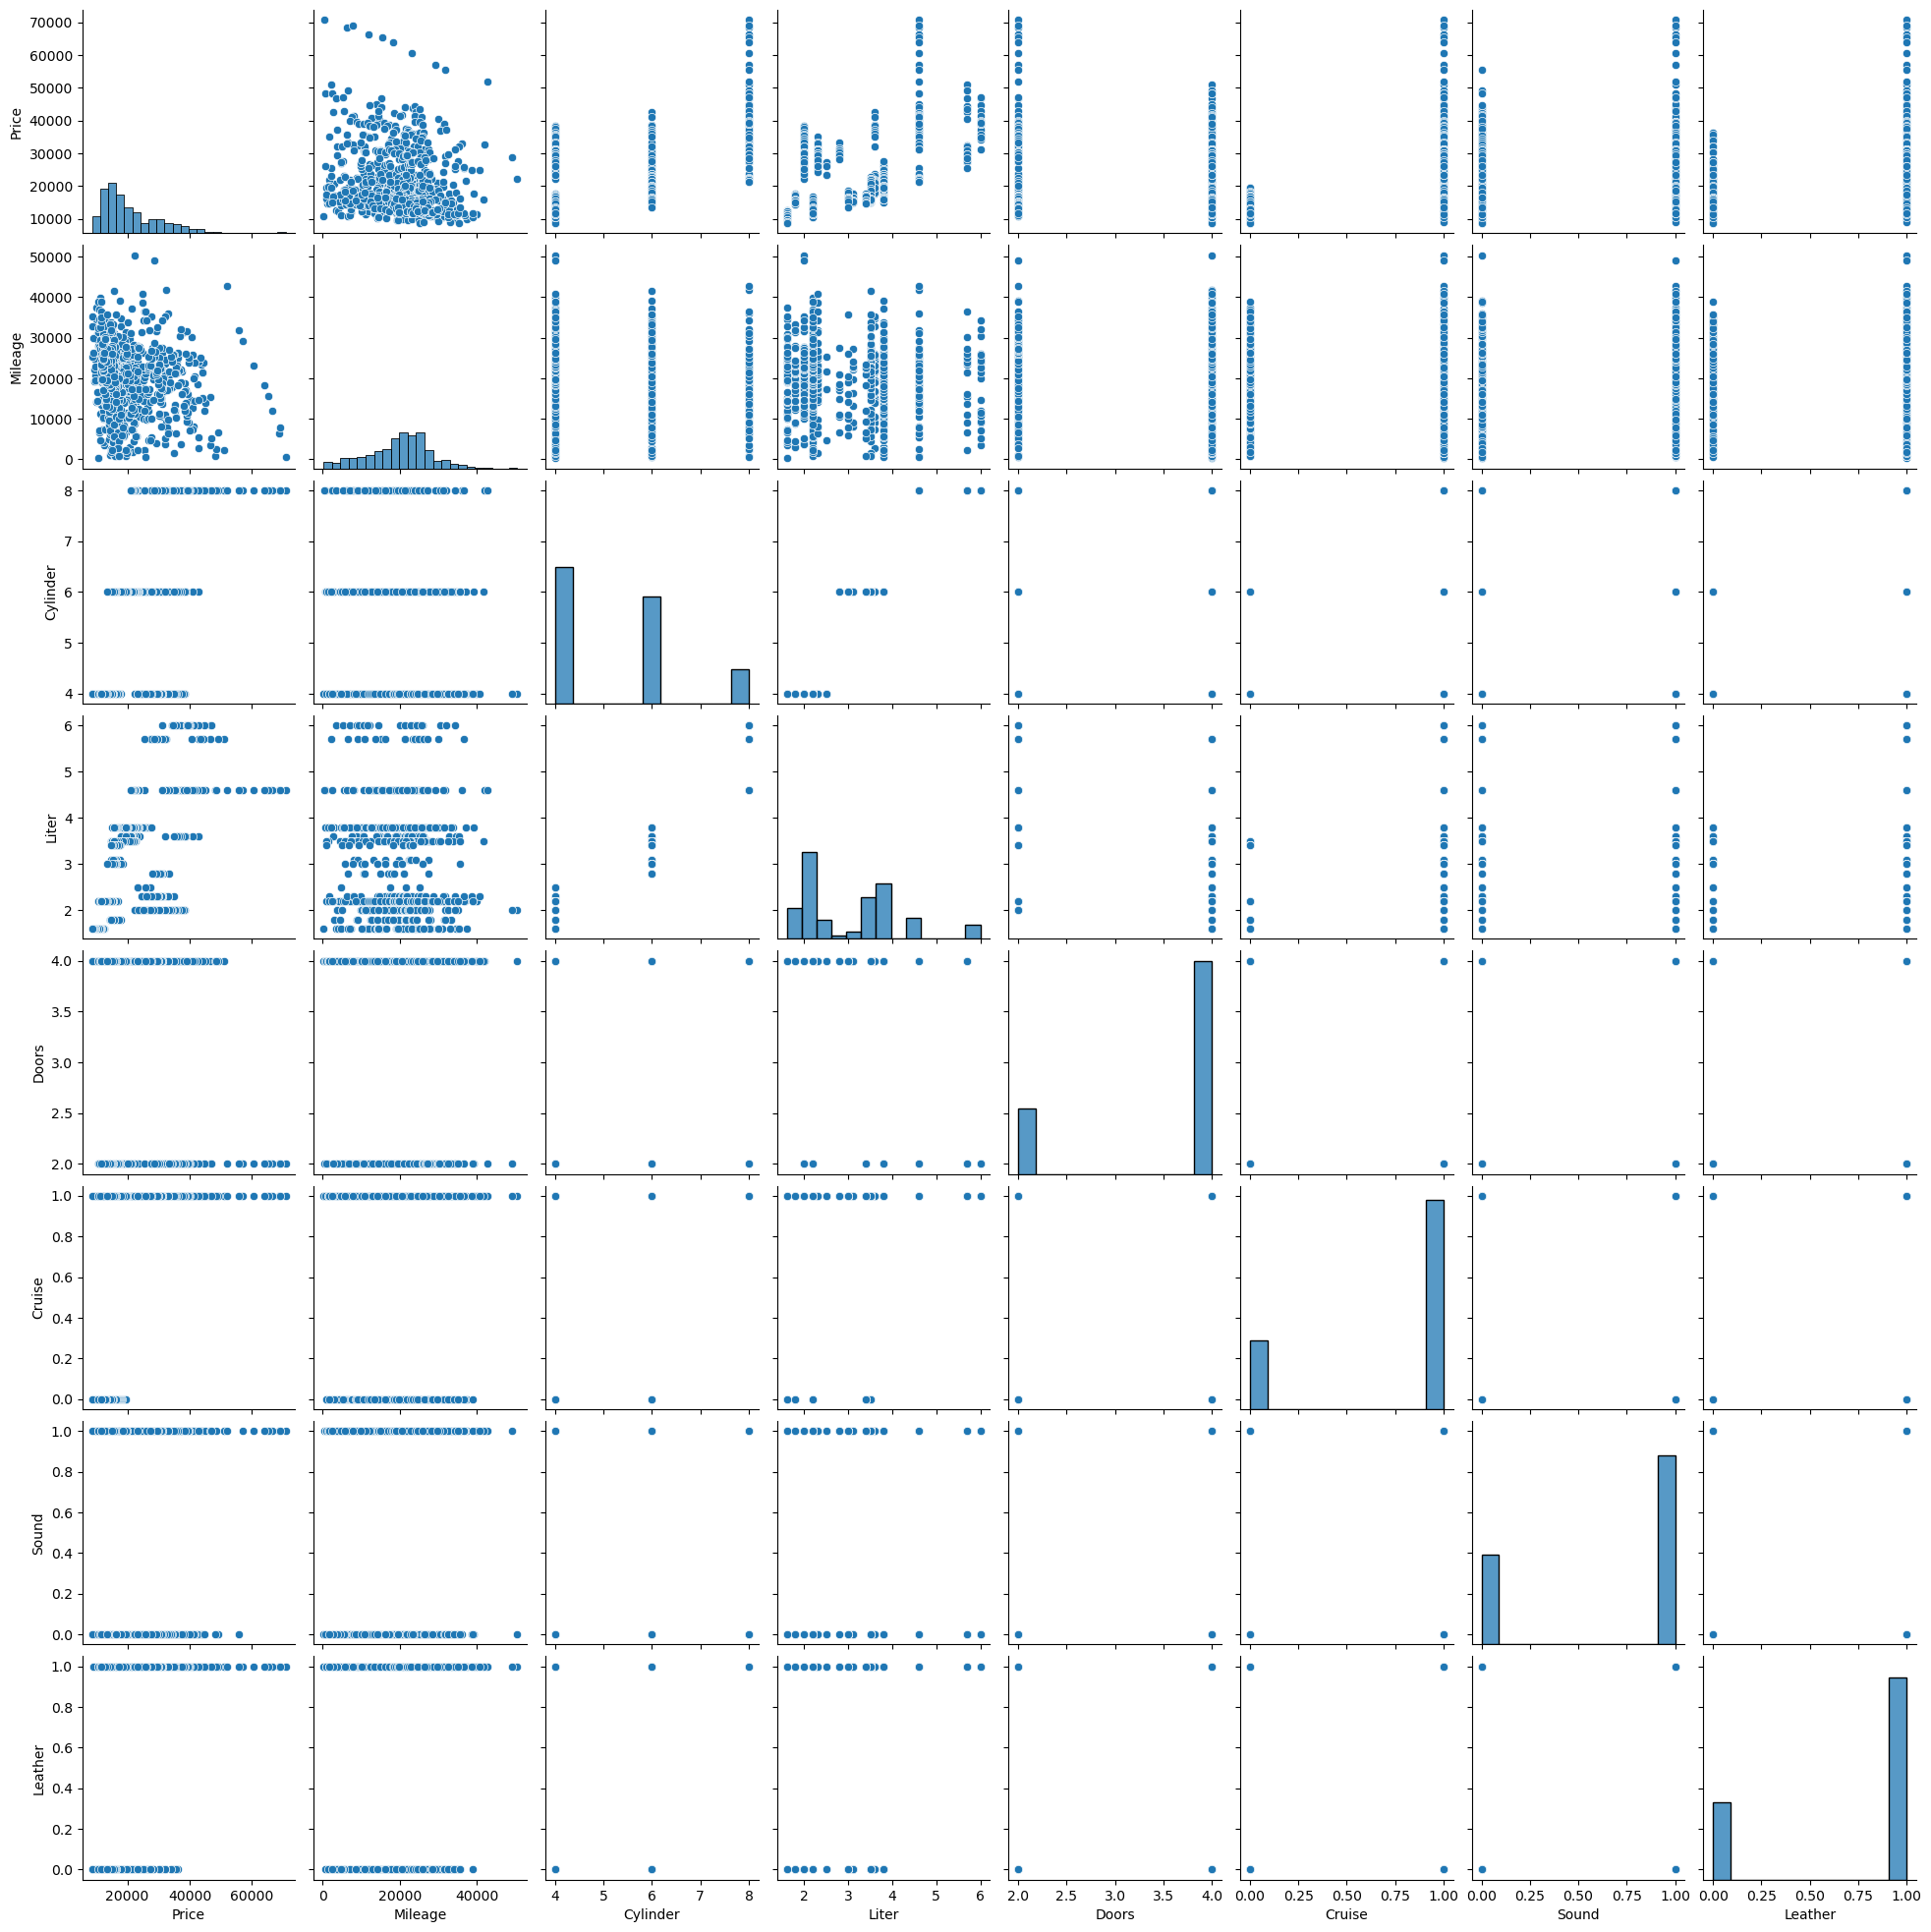

In [33]:
sns.pairplot(df)
# burada butun sutunların diğer sütünlara değişimini grafiklerler gösterdik

## Modelling

In [35]:
x=df[["Mileage","Cylinder","Liter","Cruise"]]
y=df["Price"]

In [36]:
x.columns

Index(['Mileage', 'Cylinder', 'Liter', 'Cruise'], dtype='object')

In [37]:
from sklearn.model_selection import train_test_split
#Seed

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [41]:
x_train.shape,x_test.shape

((643, 4), (161, 4))

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr=LinearRegression()

In [49]:
model=lr.fit(x_train,y_train)

In [51]:
tahmin=model.predict(x_test)

In [52]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
(mean_squared_error(tahmin,y_test))**0.5

7413.255792158801

In [57]:
r2_score(tahmin,y_test)

-0.3671260571211765

In [58]:
x=df[["Mileage","Cylinder","Liter","Cruise","Make","Trim"]]
y=df["Price"]

In [59]:
x

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D
...,...,...,...,...,...,...
799,16229,6,3.0,1,Saturn,L300 Sedan 4D
800,19095,6,3.0,1,Saturn,L300 Sedan 4D
801,20484,6,3.0,1,Saturn,L300 Sedan 4D
802,25979,6,3.0,1,Saturn,L300 Sedan 4D


In [60]:
x=pd.get_dummies(x,drop_first=True)

In [61]:
x

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16229,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
800,19095,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
801,20484,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
802,25979,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [63]:
model=lr.fit(x_train,y_train)

In [64]:
tahmin=model.predict(x_test)

In [65]:
(mean_squared_error(tahmin,y_test))**0.5

1523.631472871132

In [66]:
r2_score(tahmin,y_test)

0.9717252793475157

In [67]:
from sklearn.linear_model import Ridge, Lasso

In [68]:
R=Ridge()
L=Lasso()

In [70]:
R.fit(x_train,y_train)

Ridge()

In [72]:
tahmin2=R.predict(x_test)

In [73]:
r2_score(tahmin2,y_test)

0.968468755375492

In [75]:
L.fit(x_train,y_train)

Lasso()

In [76]:
tahmin3=L.predict(x_test)

In [78]:
(mean_squared_error(tahmin3,y_test))**0.5

1527.0430928302271

In [79]:
r2_score(tahmin3,y_test)

0.9712425418609402

In [80]:
from sklearn.linear_model import ElasticNet

In [82]:
E=ElasticNet(l1_ratio=0.8)

In [83]:
E.fit(x_train,y_train)

ElasticNet(l1_ratio=0.8)

In [86]:
tahmin4=E.predict(x_test)

In [87]:
r2_score(tahmin4,y_test)

0.39718993519691115